# Movie Production Recommendations

![image info](https://static.amazon.jobs/teams/53/images/IMDb_Header_Page.jpg?1501027252)

### Author: Aiden Bull

# Overview
A fictitious version of Microsoft is trying to start a new movie studio, but they don't know anything about the field. I used the data provided by Flatiron (a mix of data from review sites like IMDB and "The Numbers") to create three actionable insights for the studio and provided visualizations. This was done through basic data aggregation of previous movies. The three recommendations I came up with were to focus on producing movies from the two highest grossing genres (Animation & Adventure), have higher production budgets as this will yield to higher global grossing, and to release their movies during the months of May, June, July, or November since these months on average gross significantly more.

# Business Problem
I chose to focus on these recommendations after focusing down a larger list of possible insights. Some of these insights I discarded because after visualizing them there was no actionable insights (eg. runtime vs global gross. There was no correlation in this dataset therefore no recommendation came from it). There are many other recommendations that could be reached but due to the difficulty of collecting some of the other data I would want I stuck to these three. I felt these were good starting off points. There are more specific insights that might be able to be gained from this dataset but the business problem states that the new studio doesn't have any background in the subject

# Data Understanding
This data was provided to me by Flatiron school. We could have optionally gone out and got our own data but I stuck to the tn.movie_budgets.csv.gz file and the IMDB relational database. These were sufficient in answering my questions. Ideally I would have gone out and gotten some of my own data. I felt that some of the datasets were a little small and I could have answered some other more interesting questions with other datasets. Due to time constraints I stuck with what was provided

In [1]:
# Importing the relevant packages
import pandas as pd
import numpy as np
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

# Data Preparation
Loading in and previewing the datasets

In [2]:
# Loading in the data from a csv
movie_budgets_df = pd.read_csv('ZippedData/tn.movie_budgets.csv.gz', index_col=0)
movie_budgets_df.head() # Previewing the Dataframe (df)

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [3]:
movie_budgets_df.info() # Checking the dtypes and number of entries

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       5782 non-null   object
 1   movie              5782 non-null   object
 2   production_budget  5782 non-null   object
 3   domestic_gross     5782 non-null   object
 4   worldwide_gross    5782 non-null   object
dtypes: object(5)
memory usage: 271.0+ KB


Another dataset comes from a sql database <br />
The table relations: <br />

![image info](https://raw.githubusercontent.com/learn-co-curriculum/dsc-phase-1-project-v2-4/master/movie_data_erd.jpeg)

I will be focusing on the movie_basics and movie_ratings tables

In [4]:
conn = sqlite3.Connection('ZippedData/im_unzipped.db') # Making the connection to the database

In [5]:
# Grabbing the info from the two tables I want and putting them into a pandas Dataframe (df)
genres_df = pd.read_sql('''
SELECT DISTINCT movie_id, primary_title, genres, averagerating, start_year
FROM movie_ratings
INNER JOIN movie_basics
    USING(movie_id)
''', conn)

In [6]:
genres_df.head() # Previewing the df

,movie_id,primary_title,genres,averagerating,start_year
0,tt10356526,Laiye Je Yaarian,Romance,8.3,2019
1,tt10384606,Borderless,Documentary,8.9,2019
2,tt1042974,Just Inès,Drama,6.4,2010
3,tt1043726,The Legend of Hercules,"Action,Adventure,Fantasy",4.2,2014
4,tt1060240,Até Onde?,"Mystery,Thriller",6.5,2011


In [7]:
genres_df.info() # Checking the dtypes and number of entries

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   primary_title  73856 non-null  object 
 2   genres         73052 non-null  object 
 3   averagerating  73856 non-null  float64
 4   start_year     73856 non-null  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 2.8+ MB


# Data Cleaning
Both of these tables will require some cleaning/formatting to prepare them for our visualizations

In [8]:
# Checking for duplicates in the movie_budgets_df
movie_budgets_df[movie_budgets_df.duplicated(subset=['movie'])]

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
74,"May 19, 1998",Godzilla,"$125,000,000","$136,314,294","$376,000,000"
9,"Nov 21, 2018",Robin Hood,"$99,000,000","$30,824,628","$84,747,441"
85,"Jul 8, 2005",Fantastic Four,"$87,500,000","$154,696,080","$333,132,750"
44,"May 7, 1999",The Mummy,"$80,000,000","$155,385,488","$416,385,488"
8,"Jun 13, 1997",Hercules,"$70,000,000","$99,112,101","$250,700,000"
...,...,...,...,...,...
69,"Nov 16, 1942",Cat People,"$134,000","$4,000,000","$8,000,000"
77,"Oct 1, 1968",Night of the Living Dead,"$114,000","$12,087,064","$30,087,064"
78,"Feb 8, 1915",The Birth of a Nation,"$110,000","$10,000,000","$11,000,000"


In [9]:
formatted_movie_budgets_df = movie_budgets_df.copy() # Creating a copy to format
# Dropping duplicates
formatted_movie_budgets_df = formatted_movie_budgets_df.drop_duplicates() 

In [10]:
# Dropping domestic gross since we don't use it for our visualization
formatted_movie_budgets_df.drop('domestic_gross', axis=1, inplace=True)

In [11]:
# Setting the release_date to a datetime format 
formatted_movie_budgets_df['release_date'] = pd.to_datetime(formatted_movie_budgets_df['release_date'])

In [12]:
# Formatting the numbers
for r in ['production_budget', 'worldwide_gross']:
    # Removes $ symbol amd ,
    formatted_movie_budgets_df[r] = formatted_movie_budgets_df[r].str.replace('$', '').str.replace(',', '') 
    formatted_movie_budgets_df[r] = formatted_movie_budgets_df[r].astype(np.int64) # Converts from object (str) to int64
    # Divides by 100,000,000 to make it easier for the visualization
    formatted_movie_budgets_df[r] = formatted_movie_budgets_df[r]/100000000 

In [13]:
# Adding a release month column for our visualization
formatted_movie_budgets_df['release_month'] = formatted_movie_budgets_df['release_date'].dt.month_name()

Reviewing what our data looked like in the begining

In [14]:
movie_budgets_df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


Now this is what our data looks like after cleaning it and formatting for our specific visualization. All the steps I took turned the numbers from a human readable format to a format the computer can process and graph more easily.

In [15]:
formatted_movie_budgets_df.head()

,release_date,movie,production_budget,worldwide_gross,release_month
id,,,,,
1,2009-12-18,Avatar,4.250,27.763453,December
2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,4.106,10.456639,May
3,2019-06-07,Dark Phoenix,3.500,1.497623,June
4,2015-05-01,Avengers: Age of Ultron,3.306,14.030140,May
5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,3.170,13.167217,December


### Now to clean our second Dataframe

In [16]:
genres_df.head() # Reviewing the structure of the df

,movie_id,primary_title,genres,averagerating,start_year
0,tt10356526,Laiye Je Yaarian,Romance,8.3,2019
1,tt10384606,Borderless,Documentary,8.9,2019
2,tt1042974,Just Inès,Drama,6.4,2010
3,tt1043726,The Legend of Hercules,"Action,Adventure,Fantasy",4.2,2014
4,tt1060240,Até Onde?,"Mystery,Thriller",6.5,2011


In [17]:
formatted_genres_df = genres_df.copy() # Creating a copy to format

In [18]:
# Again checking for duplicates
formatted_genres_df[formatted_genres_df.duplicated()]

,movie_id,primary_title,genres,averagerating,start_year


The above code created an empty DF meaning that there were no duplicate entries <br />
**Note:** We checked for duplicates which checks over several factors to determine if the data is duplicated. Many movies have the same title which is what we see below but these are sepearate entries

In [19]:
formatted_genres_df['primary_title'].value_counts()

The Return                                                        11
Broken                                                            10
Homecoming                                                         9
Together                                                           9
Lucky                                                              9
                                                                  ..
Only New Orleans                                                   1
Jagger Gravning Syndrome: The Greatest Documentary of Our Time     1
Me Without You                                                     1
Anjali CBI                                                         1
Pencils Down! The 100 Days of the Writers Guild Strike             1
Name: primary_title, Length: 69993, dtype: int64

Next we will want to split up the genres into a more workable format for us. From "Action, Adventure, Fantasy" as one string to having each genre listed by itself

In [20]:
formatted_genres_df['genres'] = formatted_genres_df['genres'].str.split(',') # Splits the data by the ,
# creates multiple entries with each entry being linked to the seperated genres
formatted_genres_df = formatted_genres_df.explode('genres') 

In [21]:
formatted_genres_df.head(20) # Previewing the results of the split/explode

,movie_id,primary_title,genres,averagerating,start_year
0,tt10356526,Laiye Je Yaarian,Romance,8.3,2019
1,tt10384606,Borderless,Documentary,8.9,2019
2,tt1042974,Just Inès,Drama,6.4,2010
3,tt1043726,The Legend of Hercules,Action,4.2,2014
3,tt1043726,The Legend of Hercules,Adventure,4.2,2014
3,tt1043726,The Legend of Hercules,Fantasy,4.2,2014
4,tt1060240,Até Onde?,Mystery,6.5,2011
4,tt1060240,Até Onde?,Thriller,6.5,2011
5,tt1069246,Habana Eva,Comedy,6.2,2010
5,tt1069246,Habana Eva,Romance,6.2,2010


Here we can see the genres were split out into multiple entries. So instead of The Legend of Hercules being one entry with the listing of "Action, Adventure, Fantasy" we have 3 separate entries. This is the same for all movies with multiple genres listed.

In [22]:
# Checking how many listings of each genre there are
formatted_genres_df['genres'].value_counts()

Drama          30788
Documentary    17753
Comedy         17290
Thriller        8217
Horror          7674
Action          6988
Romance         6589
Crime           4611
Adventure       3817
Biography       3809
Family          3412
Mystery         3039
History         2825
Sci-Fi          2206
Fantasy         2126
Music           1968
Animation       1743
Sport           1179
War              853
Musical          721
News             579
Western          280
Reality-TV        17
Adult              3
Game-Show          2
Short              1
Name: genres, dtype: int64

We are going to remove the genres with only a few listings or else it would overly affect our aggregation

In [23]:
# Here we remove the genres "Short, Game-Show, Adult, Reality-TV" because they don't have enough data points
values = set(formatted_genres_df['genres'].value_counts()[formatted_genres_df['genres'].value_counts() < 100].index)
formatted_genres_df = formatted_genres_df[formatted_genres_df.genres.isin(values) == False]
formatted_genres_df['genres'].value_counts()

Drama          30788
Documentary    17753
Comedy         17290
Thriller        8217
Horror          7674
Action          6988
Romance         6589
Crime           4611
Adventure       3817
Biography       3809
Family          3412
Mystery         3039
History         2825
Sci-Fi          2206
Fantasy         2126
Music           1968
Animation       1743
Sport           1179
War              853
Musical          721
News             579
Western          280
Name: genres, dtype: int64

Again we will be looking at the before and after of the formatting

In [24]:
# Before formatting
genres_df.head(10)

,movie_id,primary_title,genres,averagerating,start_year
0,tt10356526,Laiye Je Yaarian,Romance,8.3,2019
1,tt10384606,Borderless,Documentary,8.9,2019
2,tt1042974,Just Inès,Drama,6.4,2010
3,tt1043726,The Legend of Hercules,"Action,Adventure,Fantasy",4.2,2014
4,tt1060240,Até Onde?,"Mystery,Thriller",6.5,2011
5,tt1069246,Habana Eva,"Comedy,Romance",6.2,2010
6,tt1094666,The Hammer,"Biography,Drama,Sport",7.0,2010
7,tt1130982,The Night Clerk,"Drama,Thriller",6.4,2011
8,tt1156528,Silent Sonata,"Drama,War",7.2,2011
9,tt1161457,Vanquisher,"Action,Adventure,Sci-Fi",4.2,2016


In [25]:
# After formatting
formatted_genres_df.head(10)

,movie_id,primary_title,genres,averagerating,start_year
0,tt10356526,Laiye Je Yaarian,Romance,8.3,2019
1,tt10384606,Borderless,Documentary,8.9,2019
2,tt1042974,Just Inès,Drama,6.4,2010
3,tt1043726,The Legend of Hercules,Action,4.2,2014
3,tt1043726,The Legend of Hercules,Adventure,4.2,2014
3,tt1043726,The Legend of Hercules,Fantasy,4.2,2014
4,tt1060240,Até Onde?,Mystery,6.5,2011
4,tt1060240,Até Onde?,Thriller,6.5,2011
5,tt1069246,Habana Eva,Comedy,6.2,2010
5,tt1069246,Habana Eva,Romance,6.2,2010


### Merging the two Dataframes
We need to do this to be able to graph out the average grossing per genre

In [26]:
# Renaming a column for the sake of making the merge easier
formatted_movie_budgets_df.rename(columns = {'movie':'primary_title'}, inplace = True)

In [27]:
# Merging the two dfs
formatted_genres_with_gross = formatted_genres_df.merge(formatted_movie_budgets_df, on='primary_title')

In [28]:
# dropping a superfluous column
formatted_genres_with_gross.drop('start_year', axis=1, inplace=True)

In [29]:
# Viewing the merged df
formatted_genres_with_gross.head()

,movie_id,primary_title,genres,averagerating,release_date,production_budget,worldwide_gross,release_month
0,tt1043726,The Legend of Hercules,Action,4.2,2014-01-10,0.7000,0.589533,January
1,tt1043726,The Legend of Hercules,Adventure,4.2,2014-01-10,0.7000,0.589533,January
2,tt1043726,The Legend of Hercules,Fantasy,4.2,2014-01-10,0.7000,0.589533,January
3,tt1094666,The Hammer,Biography,7.0,2008-03-21,0.0085,0.004426,March
4,tt1094666,The Hammer,Drama,7.0,2008-03-21,0.0085,0.004426,March


# Visualizations

### Each genres average rating and average grossing

The first graph shows the genres based off of their average ratings in descending order <br />
While the second graph shows the genres based off of the average grossing in descending order

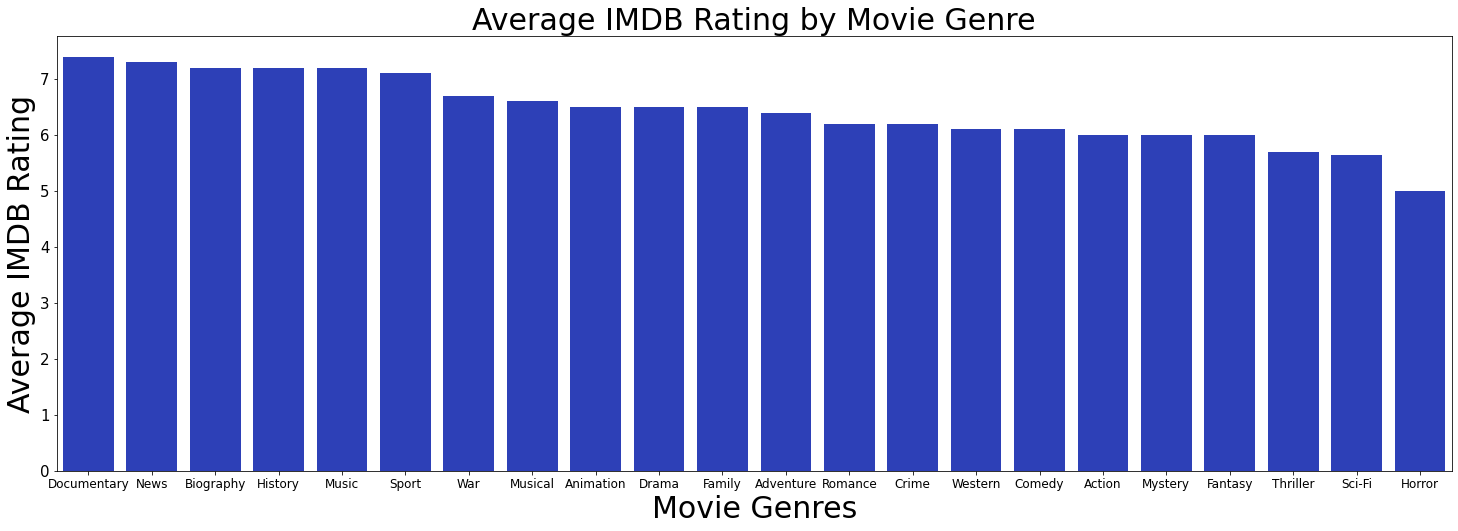

In [30]:
plt.rc('font', size=10) #controls default text size
plt.rc('axes', titlesize=30) #fontsize of the title
plt.rc('axes', labelsize=30) #fontsize of the x and y labels
plt.rc('xtick', labelsize=12) #fontsize of the x tick labels
plt.rc('ytick', labelsize=15) #fontsize of the y tick labels

# Orders data by descending median rating of each genres IMDB rating
ordered_data = formatted_genres_df.groupby('genres').median().reset_index().sort_values('averagerating', ascending=False) 
f, ax = plt.subplots(figsize=(25,8)) # Sets figsize

sns.barplot(x='genres', y='averagerating', data=ordered_data, color='#162fce', ci=None) # Plots the data/other basic formatting
plt.title('Average IMDB Rating by Movie Genre') # Sets title
plt.ylabel('Average IMDB Rating') # Sets y label
plt.xlabel('Movie Genres'); # Sets x label. Include ; at the end to remove superfluous information

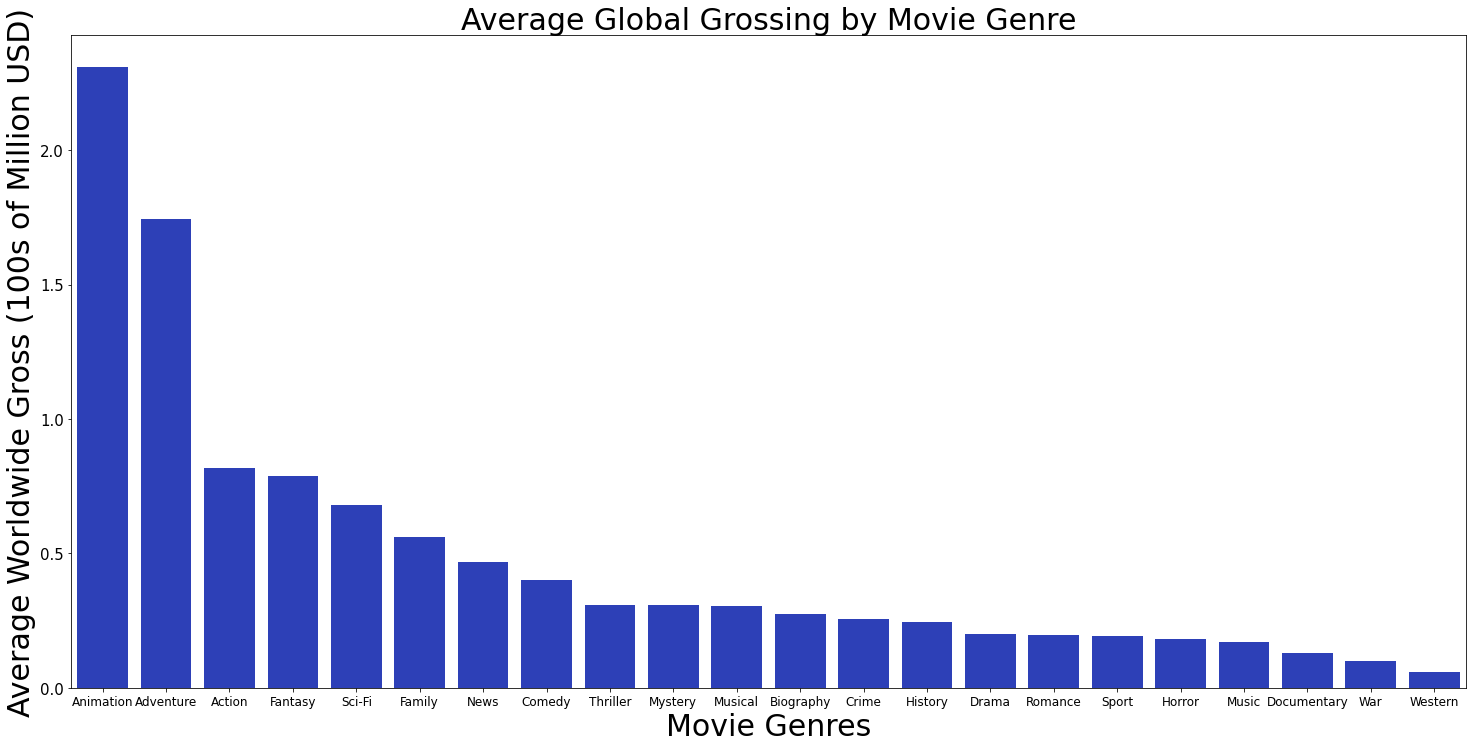

In [31]:
plt.rc('font', size=10) #controls default text size
plt.rc('axes', titlesize=30) #fontsize of the title
plt.rc('axes', labelsize=30) #fontsize of the x and y labels
plt.rc('xtick', labelsize=12) #fontsize of the x tick labels
plt.rc('ytick', labelsize=15) #fontsize of the y tick labels

# Orders data by descending median rating of each genres grossing
ordered_data = (formatted_genres_with_gross.groupby('genres')
                .median()
                .reset_index()
                .sort_values('worldwide_gross', ascending=False))
f, ax = plt.subplots(figsize=(25,12)) # Sets figsize

# Plots the data/other basic formatting
sns.barplot(x='genres', y='worldwide_gross', data=ordered_data, color='#162fce', ci=None) 
plt.title('Average Global Grossing by Movie Genre') # Sets title
plt.ylabel('Average Worldwide Gross (100s of Million USD)') # Sets y label
plt.xlabel('Movie Genres'); # Sets x label. Include ; at the end to remove superfluous information

##### Take Aways:
The studio should focus on producing movies from the top 5 grossing genres. The difference between the top rated genres and top grossing is very extreme. The highest average rated genres do not perform the best at the box office necessarily

### Production Budget vs. Worldwide Gross
Just a reminder of what the other Dataframe looks like

In [32]:
formatted_movie_budgets_df.head()

,release_date,primary_title,production_budget,worldwide_gross,release_month
id,,,,,
1,2009-12-18,Avatar,4.250,27.763453,December
2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,4.106,10.456639,May
3,2019-06-07,Dark Phoenix,3.500,1.497623,June
4,2015-05-01,Avengers: Age of Ultron,3.306,14.030140,May
5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,3.170,13.167217,December


**Note:** Pearson's correlation coefficient. This number ranges from -1 to 1 where 0 is no correlation, 1 is a perfect positive correlation and -1 is a perfect negative correlation. <br /> 
Our data at .74 has a substantial positive correlation <br />
For additional reading on Pearson's correlation coefficent click [here](https://www.sciencedirect.com/topics/social-sciences/pearson-correlation-coefficient)

In [33]:
formatted_movie_budgets_df[['worldwide_gross', 'production_budget']].corr()

,worldwide_gross,production_budget
worldwide_gross,1.000000,0.748306
production_budget,0.748306,1.000000


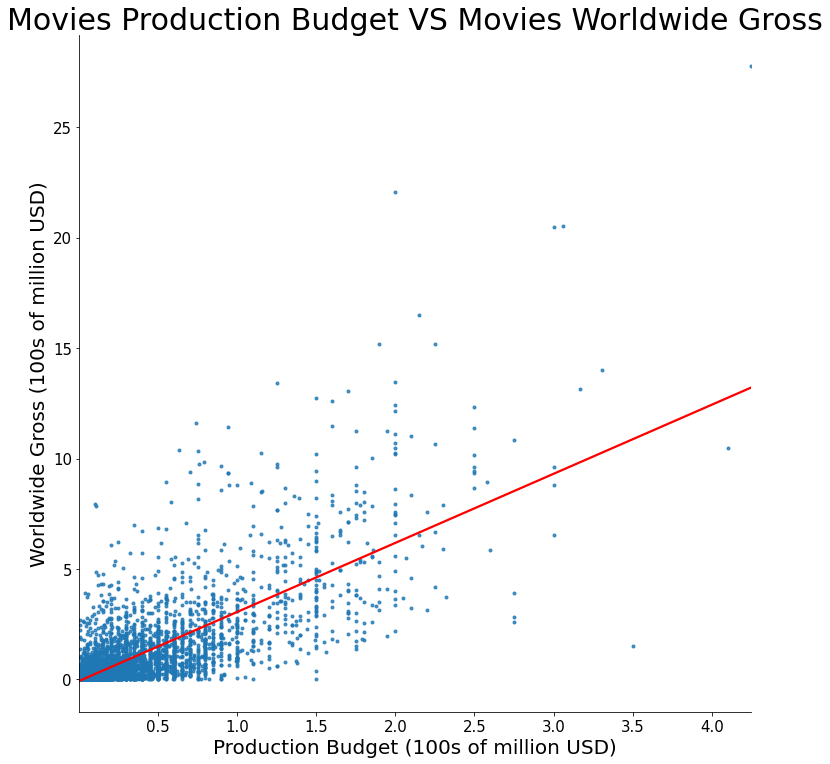

In [34]:
plt.rc('font', size=10) #controls default text size
plt.rc('axes', titlesize=30) #fontsize of the title
plt.rc('axes', labelsize=20) #fontsize of the x and y labels
plt.rc('xtick', labelsize=15) #fontsize of the x tick labels
plt.rc('ytick', labelsize=15) #fontsize of the y tick labels

f, ax = plt.subplots()
plt.close(1) # Removes first empty graph

# Plotting and some basic formatting
sns.lmplot(x='production_budget', 
           y='worldwide_gross', 
           data=formatted_movie_budgets_df, 
           line_kws = {'color': 'red'}, 
           height=10, 
           markers = '.', 
           ci=1)
plt.title('Movies Production Budget VS Movies Worldwide Gross') # Sets title
plt.ylabel('Worldwide Gross (100s of million USD)') # Sets y label
plt.xlabel('Production Budget (100s of million USD)'); # Sets x label. Include ; at the end to remove superfluous information

##### Take Aways:
There is a positive correlation between production budget and worldwide gross. We should recommend the studio have higher budgets

### What months gross the most

In [35]:
formatted_movie_budgets_df.head() # Reviewing the df

,release_date,primary_title,production_budget,worldwide_gross,release_month
id,,,,,
1,2009-12-18,Avatar,4.250,27.763453,December
2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,4.106,10.456639,May
3,2019-06-07,Dark Phoenix,3.500,1.497623,June
4,2015-05-01,Avengers: Age of Ultron,3.306,14.030140,May
5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,3.170,13.167217,December


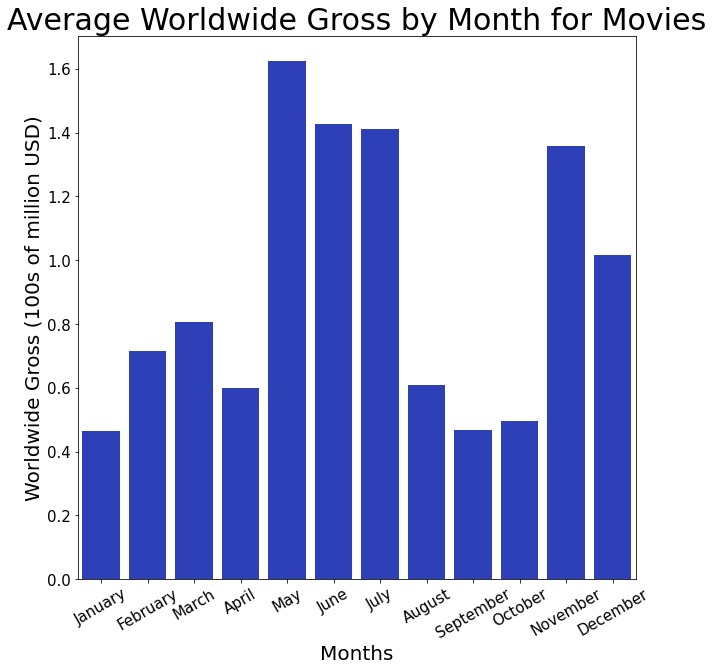

In [36]:
plt.figure(figsize=(10,10))
# make barplot, basic formatting and sets order by month (January-December)
sns.barplot(x='release_month', 
            y="worldwide_gross", 
            data=formatted_movie_budgets_df, 
            order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'],
            ci = None,
            color = '#162fce'
)
plt.xticks(rotation=30) # Sets rotation of xticks so they don't overlap
plt.title('Average Worldwide Gross by Month for Movies') # Sets title
plt.xlabel('Months') # Sets x label
plt.ylabel('Worldwide Gross (100s of million USD)'); # Sets y label. Include ; at the end to remove superfluous information

##### Take Aways:
The studio should release movies during the months of May, June, July, and November.  During these months movies tend to gross significantly more

# Evaluation
Since these are just basic visualizations it is hard to fully evaluate the effectiveness of the recommendations. These recommendations also don't guarantee that a successful movie will be made. Just knowing what genres perform the best, the best release months, and that more should be spent on budget will only get you so far.
Removing the outliers would have provided a more accurate Pearson's correlation coefficient for production budget vs worldwide gross.
None of this data was adjusted for inflation either. So the results might not be applicable. The results also have a large time scale so some trends might not be relatable to the current markets. Especially with Covid the movie market is changing rapidly

# Conclusions
As mentioned above these are pretty basic visualizations so I can only be so confident with the recommendations. The 3 recommendations I came up with were to focus on producing movies from the highest grossing genres (Animation & Adventure), increase the production budget as this will yield to higher global grossing, and to release their movies during the months of May, June, July, or November since these months on average gross significantly more. <br />
I would speculate these months gross more due to people having more free time during the summer months. And for November I am not sure as to why this month on average grossed more. This could have just been from the natural release cycle of blockbuster movies being ready for release in November. <br /><br />
Additionally there is more you could do to provide more concrete and backed up recommendations but much of that would be beyond the scope of this project (doing sentiment analysis, predictive analysis, etc.). Within the scope of this project I would want to gain more insight on the movie industry to find out why November on average grosses more. In this analysis I only looked at global gross. I think it would be beneficial to look at total profit (including other sales not just box office) but that data was extremely difficult to find. All I saw were rough estimates and they were wiledly different depending on the sources you looked at. I would also like to look into more recommendations (Find which directors gross the most, look at the correlation between marketing budget and global gross, what release structure has performed the best during covid) just to list a few.